In [30]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance


/home/nlp/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [24]:
data = pd.read_csv("/home/nlp/Downloads/students-academic-performance-dataset.zip")

In [25]:
len(data)

480

In [26]:
data.head(4)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L


In [27]:
data.columns

Index([u'gender', u'NationalITy', u'PlaceofBirth', u'StageID', u'GradeID',
       u'SectionID', u'Topic', u'Semester', u'Relation', u'raisedhands',
       u'VisITedResources', u'AnnouncementsView', u'Discussion',
       u'ParentAnsweringSurvey', u'ParentschoolSatisfaction',
       u'StudentAbsenceDays', u'Class'],
      dtype='object')

In [28]:
-

SyntaxError: invalid syntax (<ipython-input-28-eca4e71ffbc8>, line 2)

In [32]:
data['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [33]:
data['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Lybia            6
Iran             6
Syria            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

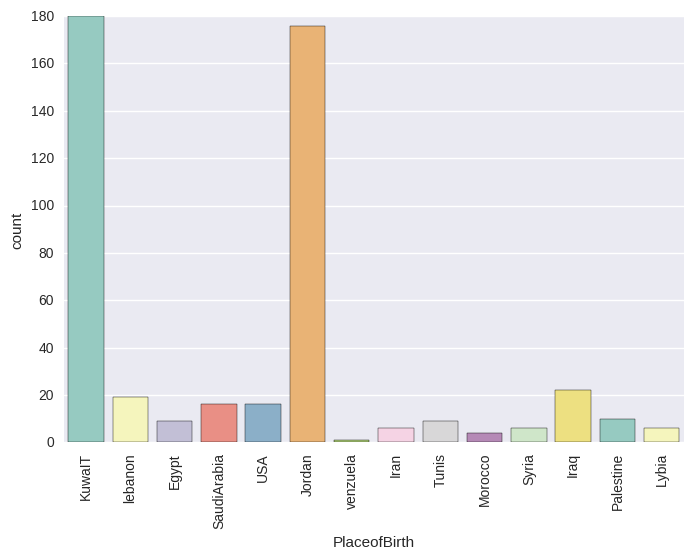

In [42]:
nationality = sns.countplot(x = 'PlaceofBirth', data=data, palette='Set3')
nationality.set(xlabel='PlaceofBirth',ylabel='count', label= "Students Birth Place")
plt.setp(nationality.get_xticklabels(), rotation=90)
plt.show()

In [147]:
pd.crosstab(data['Class'],data['Topic'])

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


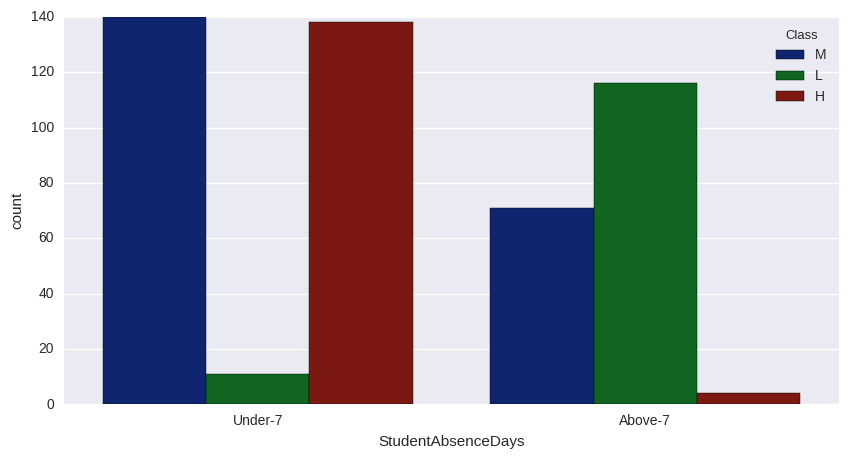

In [148]:
sns.countplot(x='StudentAbsenceDays',data = data, hue='Class',palette='dark')
plt.show()



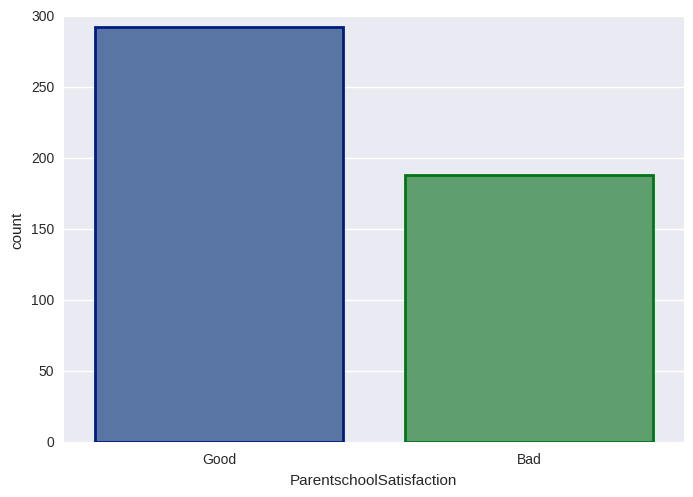

In [50]:
P_Satis = sns.countplot(x="ParentschoolSatisfaction",data=data,linewidth=2,edgecolor=sns.color_palette("dark"))

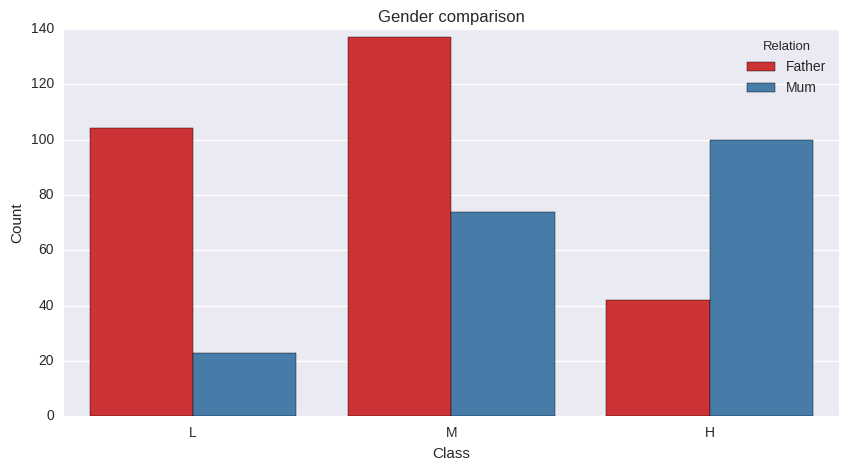

In [63]:
# gender comparison Relationship with Pare
plot = sns.countplot(x='Class', hue='Relation', data=data, order=['L', 'M', 'H'], palette='Set1')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison')
plt.show()

#educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

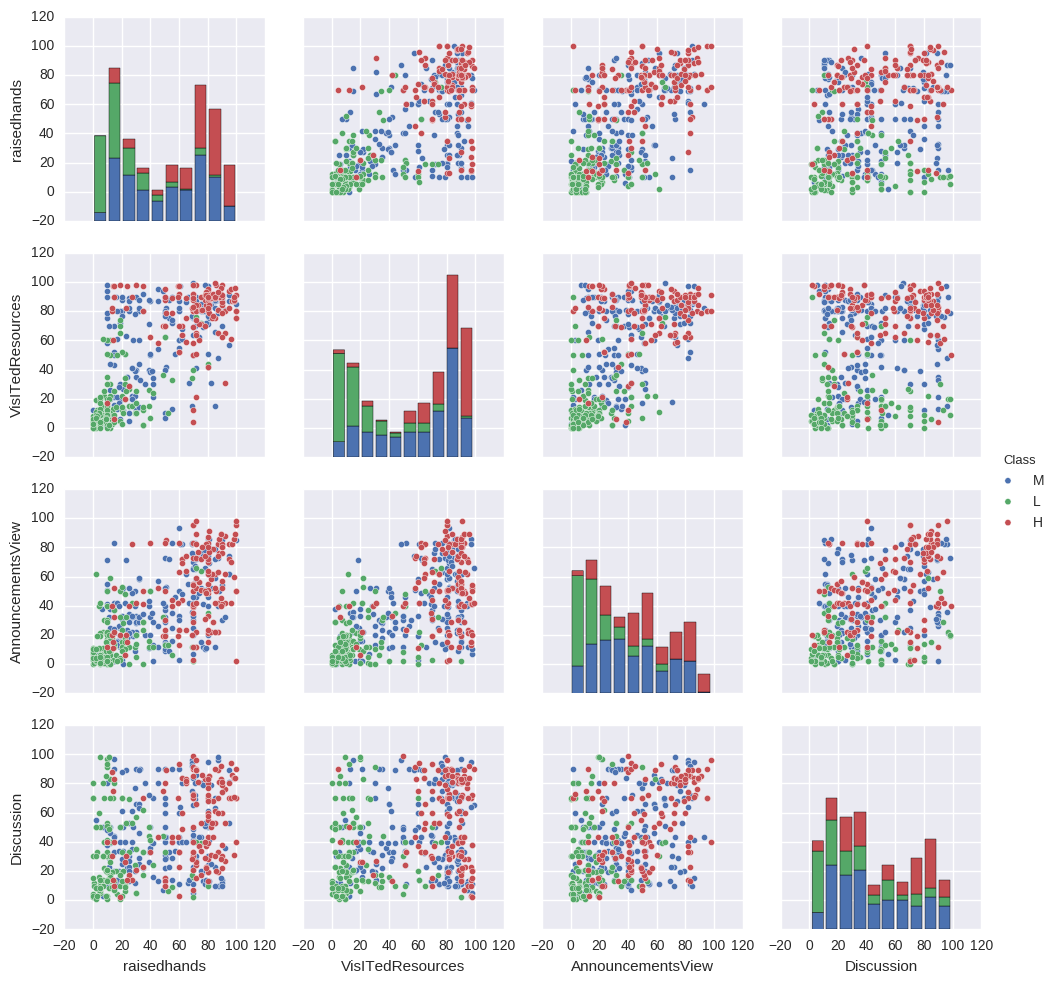

In [151]:
sns.pairplot(data,hue='Class')

In [71]:
data.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [74]:
Features = data.drop('Class',axis=1)
Target = data['Class']

In [78]:
label = LabelEncoder()

In [85]:
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)

In [89]:
Logit_Model = LogisticRegression()

In [90]:
Logit_Model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
Prediction = Logit_Model.predict(X_test)

In [97]:
Score = accuracy_score(y_test,Prediction)

In [98]:
Score

0.80208333333333337

In [99]:
Report = classification_report(y_test,Prediction)

In [105]:
print (Report)

             precision    recall  f1-score   support

          H       0.84      0.77      0.81        35
          L       0.78      0.95      0.86        22
          M       0.78      0.74      0.76        39

avg / total       0.80      0.80      0.80        96



In [138]:
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print (classification_report(y_test,xgb_pred))

             precision    recall  f1-score   support

          H       0.88      0.80      0.84        35
          L       0.85      1.00      0.92        22
          M       0.82      0.79      0.81        39

avg / total       0.84      0.84      0.84        96



In [139]:
print(accuracy_score(y_test,xgb_pred))

0.84375


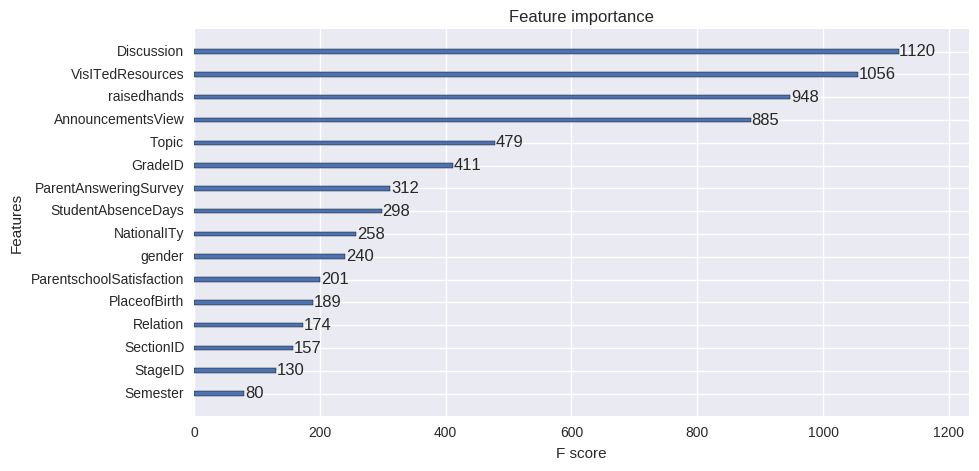

In [140]:
plot_importance(xgb)